## Read DICOM

#### 1. Import associated Iibrary

In [2]:
# !pip install pydicom

In [3]:
# !pip install dicompyler-core

In [1]:
# read DICOM data lib
# ref. https://pydicom.github.io/pydicom
import pydicom
# dicom parser
# ref. https://pypi.org/project/dicompyler-core/
import dicompylercore
from dicompylercore import dicomparser
# array process
# ref. https://numpy.org
# Chinese ref. https://blog.techbridge.cc/2017/07/28/data-science-101-numpy-tutorial/
import numpy as np
# store array
import pickle
# for system operation
import sys
# image
import PIL.Image
import matplotlib.pyplot as plt
from PIL.Image import fromarray
import os
import cv2
import PIL # optional

#### 2. Load DICOM file

###### Load file

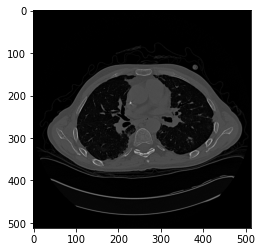

In [3]:
# ds = pydicom.dcmread("CT-7358-0011.dcm")
ds = pydicom.dcmread("Database/ILD_DB_lungMasks/12/CT-0921-0014.dcm")
# ds = pydicom.dcmread("Database/ILD_DB_lungMasks/3/CT-7358-0009.dcm")
plt.imshow(ds.pixel_array , 'gray')

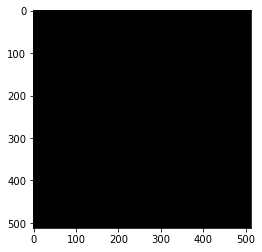

In [4]:
# ds = pydicom.dcmread("Database/ILD_DB_lungMasks/35/lung_mask/lung_mask_1186_5.dcm")
ds = pydicom.dcmread("Database/ILD_DB_lungMasks/12/roi_mask/roi_mask_921_14.dcm")
plt.imshow(ds.pixel_array , cmap = 'gray')

In [6]:
topfile = "Database/ILD_DB_lungMasks/"
secondfile = []
for file in os.listdir(topfile):
    secondfile.append(file)
print(secondfile)

['101', '105', '107', '108', '109', '112', '116', '118', '119', '12', '120', '121', '122', '123', '124', '126', '127', '128', '129', '130', '131', '132', '134', '135', '136', '137', '138', '140', '142', '143', '144', '147', '149', '150', '152', '153', '154', '155', '157', '158', '159', '160', '162', '163', '164', '165', '166', '167', '168', '169', '17', '171', '172', '173', '174', '175', '177', '179', '180', '181', '182', '183', '184', '185', '19', '200', '201', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '23', '3', '34', '35', '36', '37', '38', '39', '41', '45', '46', '47', '48', '51', '53', '56', '57', '62', '65', '66', '7', '70', '74', '76', '77', '78', '8', '80', '81', '82', '83', '84', '89', '90', '92', '94']


In [17]:
import shutil
PNG = False

image_name = []#list for image name in the specific file
under_file = []#list 用來儲存資料夾下的其他資料夾(如mask資料夾 
filename = r".dcm"#the file end with dcm
root = "Database/ILD_DB_volumeROls"
for file in secondfile[1:-1]:
    image_name = []
    under_file = []
    print(file)
    filepath = root + '/' + file
    jpg_des = filepath + "/JPG"
    for file in os.listdir(filepath):
        if file.endswith(filename):
            image_name.append(file)
        else:
            under_file.append(file)
    print(jpg_des)
    #Convert dcm to jpg(unmasked)
    if not os.path.isdir(jpg_des):
        os.mkdir(jpg_des)
        for n , image in enumerate(image_name):
            ds = pydicom.dcmread(os.path.join(filepath, image))
            pixel_array_numpy = ds.pixel_array
            if PNG == False:
                image = image.replace('.dcm', '.jpg')
            else:
                image = image.replace('.dcm', '.png')
            cv2.imwrite(os.path.join(jpg_des, image), pixel_array_numpy)
    print(under_file)


    #Convert dcm to jpg(masked)
    image_name = []
    for name in under_file:
        filepath_new = filepath + '/' + name
        jpg_des_new = filepath_new + "/JPG"
        if(name == "lung_mask"):#choose masked folder
            if not os.path.isdir(jpg_des_new):
                os.mkdir(jpg_des_new)
#         else:
#             try:
#                 shutil.rmtree(jpg_des_new)
#             except OSError as e:
#                 print(e)
#             else:
#                 print("nothing")

#         print(jpg_des_new)
            for file in os.listdir(filepath_new):
                if file.endswith(filename):
                    image_name.append(file)
            for n , image in enumerate(image_name):
                ds = pydicom.dcmread(os.path.join(filepath_new, image))
                pixel_array_numpy = ds.pixel_array
                if PNG == False:
                    image = image.replace('.dcm', '.jpg')
                else:
                    image = image.replace('.dcm', '.png')
        #         print(jpg_des_new)
                if not os.path.isdir(jpg_des_new):
                    os.mkdir(jpg_des_new)
                cv2.imwrite(os.path.join(jpg_des_new, image), pixel_array_numpy)

105
Database/ILD_DB_volumeROls/105/JPG
['JPG', 'roi_mask']
107
Database/ILD_DB_volumeROls/107/JPG
['JPG', 'roi_mask']
108
Database/ILD_DB_volumeROls/108/JPG
['JPG', 'roi_mask']
109
Database/ILD_DB_volumeROls/109/JPG
['JPG', 'roi_mask']
112
Database/ILD_DB_volumeROls/112/JPG
['JPG', 'roi_mask']
116
Database/ILD_DB_volumeROls/116/JPG
['JPG', 'roi_mask']
118
Database/ILD_DB_volumeROls/118/JPG
['JPG', 'roi_mask']
119
Database/ILD_DB_volumeROls/119/JPG
['JPG', 'roi_mask']
12
Database/ILD_DB_volumeROls/12/JPG
['roi_mask']
120
Database/ILD_DB_volumeROls/120/JPG
['JPG', 'roi_mask']
121
Database/ILD_DB_volumeROls/121/JPG
['JPG', 'roi_mask']
122
Database/ILD_DB_volumeROls/122/JPG
['JPG', 'roi_mask']
123
Database/ILD_DB_volumeROls/123/JPG
['JPG', 'roi_mask']
124
Database/ILD_DB_volumeROls/124/JPG
['JPG', 'roi_mask']
126
Database/ILD_DB_volumeROls/126/JPG
['JPG', 'roi_mask']
127
Database/ILD_DB_volumeROls/127/JPG
['JPG', 'roi_mask']
128
Database/ILD_DB_volumeROls/128/JPG
['JPG', 'roi_mask']
129
Da

In [126]:
type(ds)

pydicom.dataset.FileDataset

###### All attribute ds had, patient's basic information and CT information

In [127]:
for each in ds:
    print(each)

(0008, 0000) Group Length                        UL: 186
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113704.1.111.4008.1103724407.26617
(0008, 0020) Study Date                          DA: '20041222'
(0008, 0030) Study Time                          TM: '150410.000000'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CT'
(0008, 0090) Referring Physician's Name          PN: ' '
(0008, 103e) Series Description                  LO: 'INSPIRIUM'
(0010, 0000) Group Length                        UL: 68
(0010, 0010) Patient's Name                      PN: 'Anonymous'
(0010, 0020) Patient ID                          LO: 'Anonymous-ID'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's Age              

#### pixel to mm
eg. (0028, 0030) Pixel Spacing                       DS: ['0.62109375', '0.62109375']

The first value is the row spacing in mm, that is the spacing between the centers of adjacent rows, or vertical spacing.

The second value is the column spacing in mm, that is the spacing between the centers of adjacent columns, or horizontal spacing.

https://dicom.innolitics.com/ciods/ct-image/image-plane/00280030

https://dicom.innolitics.com/ciods/ct-image/image-plane/00200037

###### patient's basic info

In [62]:
ds.PatientName

'Anonymous'

In [63]:
ds.PatientID

'Anonymous-ID'

In [64]:
ds.PatientSex

'M'

In [65]:
# ds.BodyPartExamined

In [66]:
np.unique(ds.pixel_array)

array([   0,    1,    2, ..., 2929, 3238, 3253], dtype=uint16)

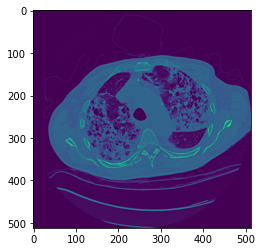

In [67]:
plt.imshow(ds.pixel_array)

###### DICOM info

In [41]:
ds.RescaleSlope

"1.0"

In [42]:
ds.RescaleIntercept

"-1000.0"

In [43]:
ds.WindowCenter

[-0600, -0600]

In [44]:
ds.WindowWidth

[01600, 01600]

In [45]:
ds.PixelSpacing

[0.796875, 0.796875]

###### Parsing DICOM to array

In [46]:
dp = dicomparser.DicomParser(ds)

In [47]:
ct_pixelarray = ds.pixel_array # get orginal pixel array in dicom

In [48]:
type(ct_pixelarray)

numpy.ndarray

In [49]:
ct_pixelarray.shape

(512, 512)

In [50]:
np.min(ct_pixelarray)

0

In [51]:
np.max(ct_pixelarray)

3253

In [52]:
loc = str("{0:.2f}".format(ds.SliceLocation)) #. eg.-117.5 -> z-axle, 取到小數後2位
print("Processing",loc)

Processing -347.50


#### 3. Hounsfield unit transfer
air = -1000
water = 0
blood = 20
bone = 200~1000

In [53]:
def Hounsfield_unit(input_array, slope, intercept, lowerbound, upperbound):
    # Hounsfield_unit( original_array, 1, -1024, -190, -30)
    temp_ary = input_array * slope + intercept
    final_ary = np.where(temp_ary>upperbound, -1000, temp_ary)
    final_ary = np.where(final_ary<lowerbound, -1000, final_ary)
    return final_ary

In [54]:
hu_min = ds.WindowCenter[0] - ds.WindowWidth[0]*0.5
hu_max = ds.WindowCenter[0] + ds.WindowWidth[0]*0.5

In [55]:
data_array = Hounsfield_unit(ct_pixelarray, ds.RescaleSlope, ds.RescaleIntercept, np.min(ct_pixelarray), np.max(ct_pixelarray))

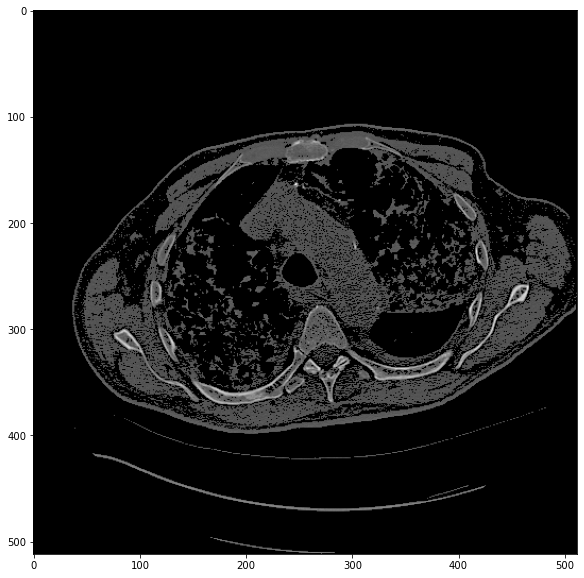

In [56]:
plt.figure(figsize=(10,10))
plt.imshow(data_array, cmap='gray')

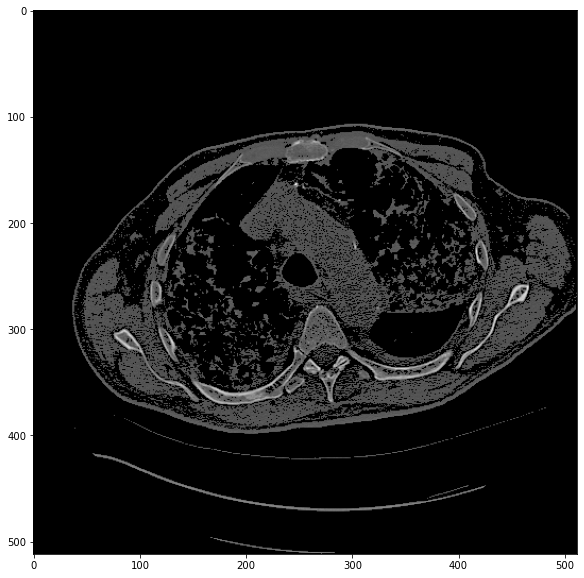

In [57]:
plt.figure(figsize=(10,10))
plt.imshow(data_array, cmap='gray')

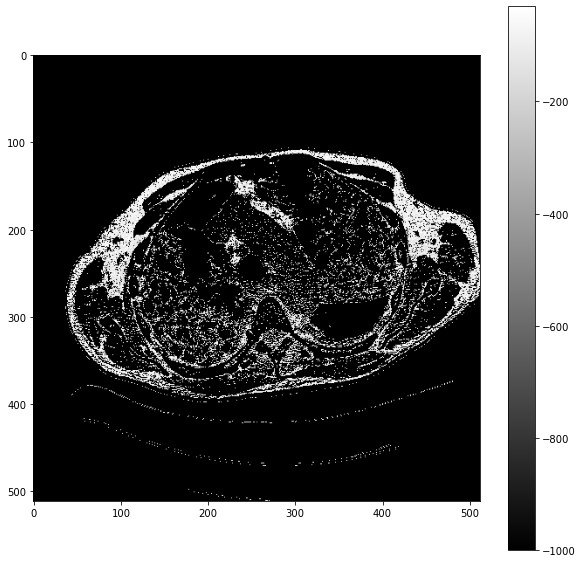

In [58]:
eat_array = Hounsfield_unit(ct_pixelarray, ds.RescaleSlope, ds.RescaleIntercept, -190, -30)
plt.figure(figsize=(10,10))
plt.imshow(eat_array, cmap='gray')
plt.colorbar()

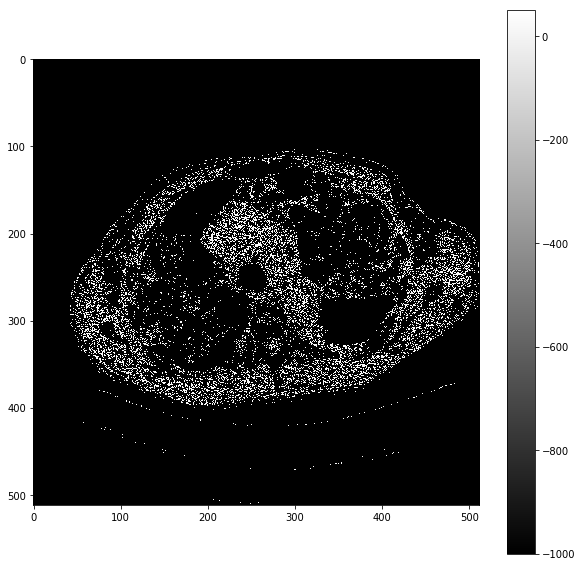

In [34]:
peri_array = Hounsfield_unit(ct_pixelarray, ds.RescaleSlope, ds.RescaleIntercept, 0, 50)
plt.figure(figsize=(10,10))
plt.imshow(peri_array, cmap='gray')
plt.colorbar()

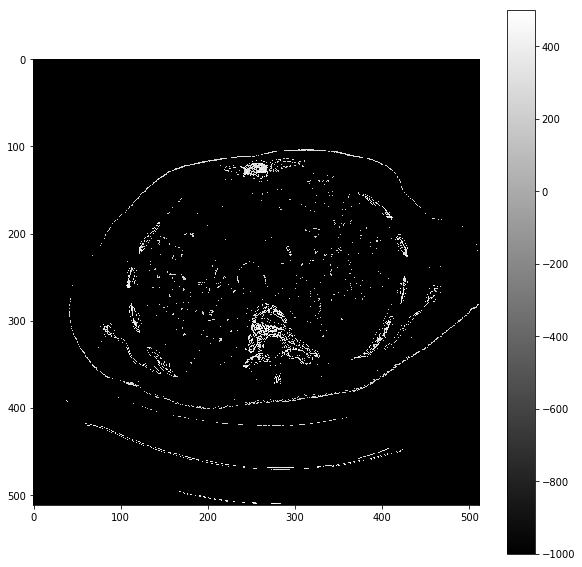

In [35]:
blood_array = Hounsfield_unit(ct_pixelarray, ds.RescaleSlope, ds.RescaleIntercept, 200, 500)
plt.figure(figsize=(10,10))
plt.imshow(blood_array, cmap='gray')
plt.colorbar()

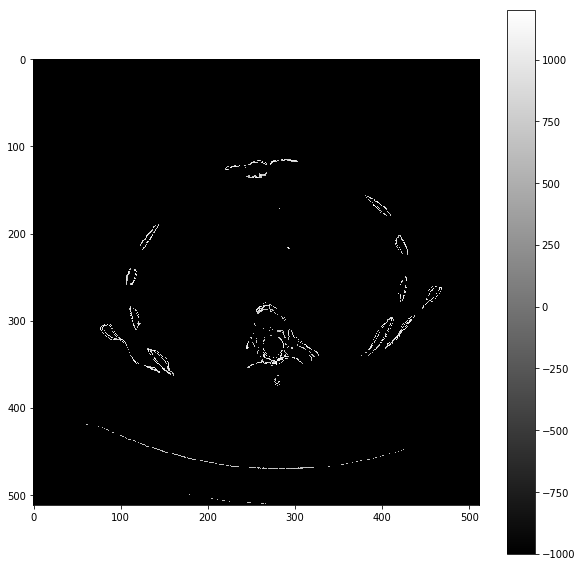

In [36]:
bone_array = Hounsfield_unit(ct_pixelarray, ds.RescaleSlope, ds.RescaleIntercept, 600, 1200)
plt.figure(figsize=(10,10))
plt.imshow(bone_array, cmap='gray')
plt.colorbar()

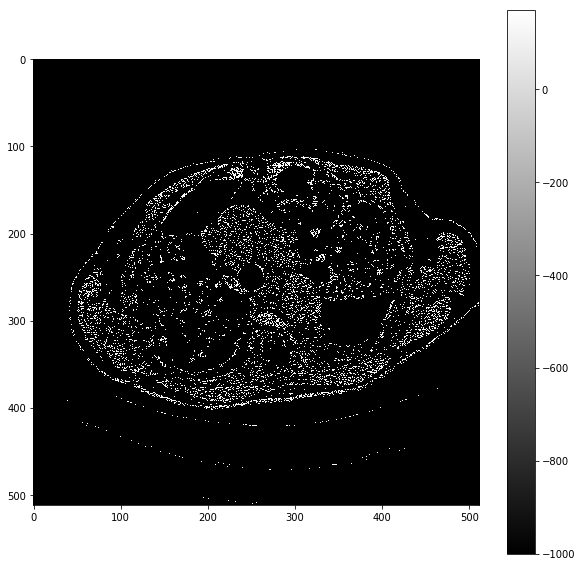

In [37]:
muscle_array = Hounsfield_unit(ct_pixelarray, ds.RescaleSlope, ds.RescaleIntercept, 100, 170)
plt.figure(figsize=(10,10))
plt.imshow(muscle_array, cmap='gray')
plt.colorbar()

In [38]:
np.min(data_array)

-1000.0

In [39]:
np.max(data_array)

1931.0

#### 4. Show image

###### original CT

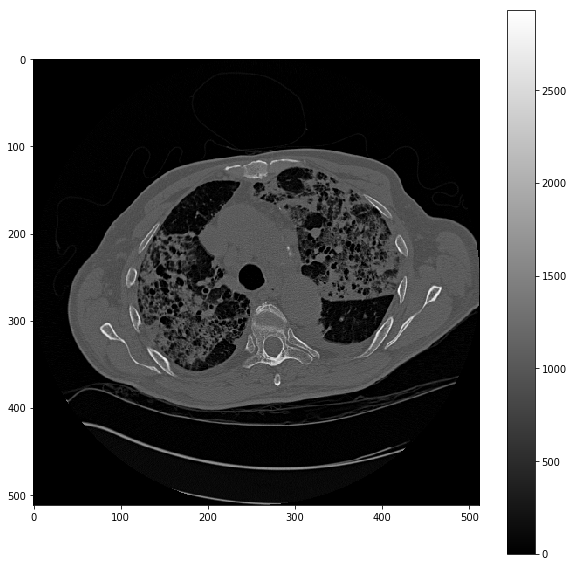

In [40]:
plt.figure(figsize=(10,10))
plt.imshow(ct_pixelarray, cmap = 'gray')
plt.colorbar()

In [41]:
#!pip install albumentations

In [42]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from IPython.display import display, HTML 

from albumentations import (VerticalFlip, HorizontalFlip, Flip, RandomRotate90, Rotate, ShiftScaleRotate, CenterCrop, OpticalDistortion, GridDistortion, ElasticTransform, JpegCompression, HueSaturationValue,
                            RGBShift, RandomBrightness, RandomContrast, Blur, MotionBlur, MedianBlur, GaussNoise, CLAHE, ChannelShuffle, InvertImg, RandomGamma, ToGray, PadIfNeeded , Compose, 
                            BboxParams
                           )

In [43]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.colorbar()
    return image

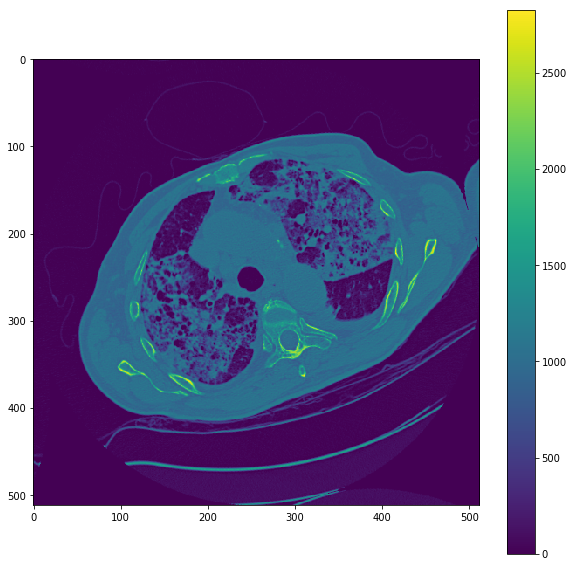

In [44]:
aug = Rotate(limit=45, p=1)
after = augment_and_show(aug, ct_pixelarray)

In [45]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params=BboxParams(format='coco', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

In [46]:
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=3000, thickness=thickness) #bounding box
#     class_name = class_idx_to_name[class_id]
#     ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
#     cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
#     cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)
    plt.colorbar()

In [47]:
##The coco format of a bounding box looks like [x_min, y_min, width, height], e.g. [97, 12, 150, 200].
annotations = {'image': ct_pixelarray, 'bboxes': [[120, 120, 200, 200]], 'category_id': [17]}
category_id_to_name = {17: 'cat', 18: 'dog'}

In [49]:
# ct_pixelarray==augmented['image']

In [50]:
# augmented

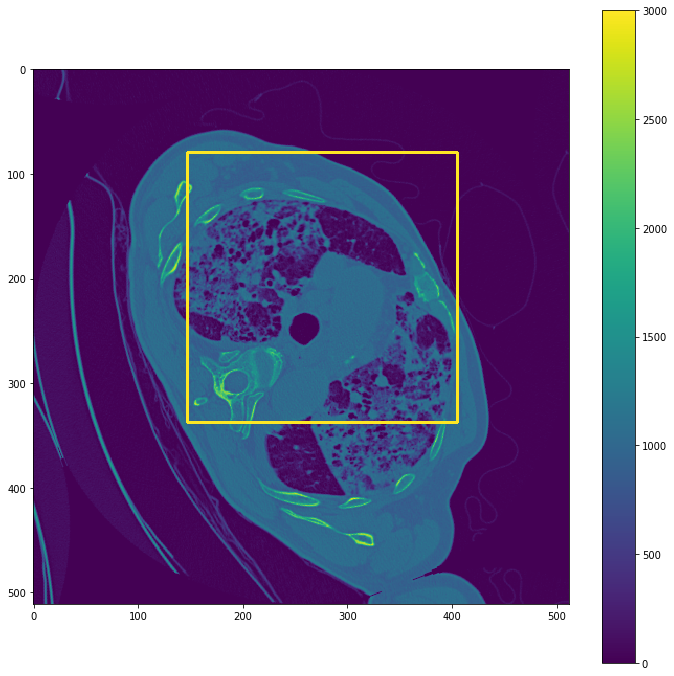

In [51]:
aug = get_aug([Rotate(limit=90, p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

###### after HU transfer CT

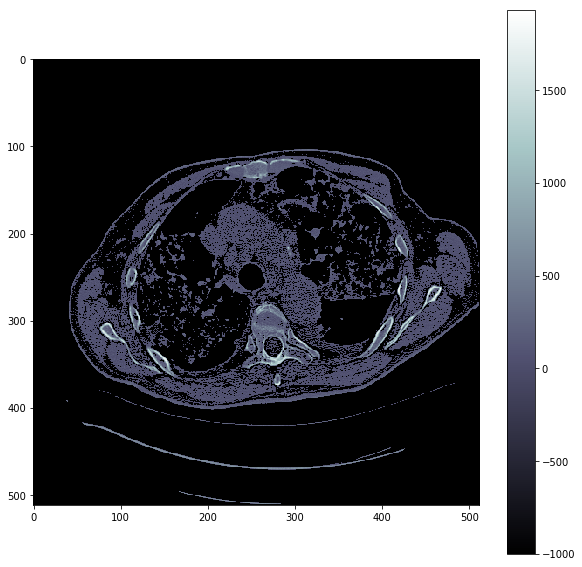

In [52]:
plt.figure(figsize=(10,10))
plt.imshow(data_array, cmap='bone')
plt.colorbar()

#### 5. Store array to pickle file

In [53]:
pickle.dump(data_array, open("data.pkl", 'wb'), protocol=pickle.HIGHEST_PROTOCOL)

------------------------------------------------------------------

check accuracy by true cell position

In [54]:
def IOU_area(y_pred, y_true, real_bbox, pred_bbox):
    # index of existed value
    true_index_x = np.floor_divide(np.argmax(y_true[:,:,-1]),GLOBAL_CELLS_PER_AXIS)
    true_index_y = np.argmax(y_true[:,:,-1]) % GLOBAL_CELLS_PER_AXIS
    
    pred_index_x = np.floor_divide(np.argmax(y_pred[:,:,-1]),GLOBAL_CELLS_PER_AXIS)
    pred_index_y = np.argmax(y_pred[:,:,-1]) % GLOBAL_CELLS_PER_AXIS
    
    
    # w & h
    # predict part
    # use mean box
    pred_w = np.exp(y_pred[pred_index_x,pred_index_y,0])*pred_bbox[0] # single value
    pred_h = np.exp(y_pred[pred_index_x,pred_index_y,1])*pred_bbox[1] # single value
    
    true_w = np.sum(np.exp(y_true[true_index_x,true_index_y,0])*real_bbox[0]*y_true[:,:,-1]) # single value
    true_h = np.sum(np.exp(y_true[true_index_x,true_index_y,1])*real_bbox[1]*y_true[:,:,-1]) # single value
    #-----------------------------

    # x & y
    # predict part
    pred_x = y_pred[pred_index_x, pred_index_y, 2]*GLOBAL_CELLS_SIZE + pred_index_x*GLOBAL_CELLS_SIZE
    pred_y = y_pred[pred_index_x, pred_index_y, 3]*GLOBAL_CELLS_SIZE + pred_index_y*GLOBAL_CELLS_SIZE
        
    # true part
    true_x = y_true[true_index_x,true_index_y, 2]*GLOBAL_CELLS_SIZE + true_index_x*GLOBAL_CELLS_SIZE
    true_y = y_true[true_index_x,true_index_y, 3]*GLOBAL_CELLS_SIZE + true_index_y*GLOBAL_CELLS_SIZE
    #------------------------------
    
    # area comparision
    # predict area
    if pred_x-pred_w < 0 or pred_y-pred_h<0:
        print("may neg inf")
    pred_startx = int(pred_x-pred_w/2)
    if pred_startx<0:
        pred_startx=0
    pred_endx = int(pred_x+pred_w/2)
    if pred_endx<0:
        pred_endx=0
    pred_starty = int(pred_y-pred_h/2)
    if pred_starty<0:
        pred_starty=0
    pred_endy = int(pred_y+pred_h/2)
    if pred_endy<0:
        pred_endy=0
        
    pred_ary = np.zeros((512, 512))
    pred_ary[pred_starty:pred_endy, pred_startx:pred_endx] = 1
    #----------------------
    
    # real area
    
    true_startx = int(true_x-true_w/2)
    true_endx = int(true_x+true_w/2)
    true_starty = int(true_y-true_h/2)
    true_endy = int(true_y+true_h/2)
    true_ary = np.zeros((512, 512))
    true_ary[true_starty:true_endy, true_startx:true_endx] = 1
    # IOU part
    if np.sum(true_ary)<=0:
        print("true ary has 0")
    if np.sum(pred_ary)<=0:
        print("pred ary has 0")
    
    
    intersect = np.sum(np.logical_and(true_ary, pred_ary))
    union = np.sum(true_ary) + np.sum(pred_ary) - intersect
    
    # IOU part
    intersect = np.sum(np.logical_and(true_ary, pred_ary))
    union = np.sum(true_ary) + np.sum(pred_ary) - intersect
#     print("IOU : ", intersect/union)
    
    return intersect/union
    

In [55]:
def check_accuracy(img_ary, after_mask):
    
    y_pred = yolo_model.predict(np.expand_dims(img_ary, axis=-1))[2]
    y_true = after_mask
    
#     softmax = lambda x: np.softmax(x, axis=-1)
    all_true_c = y_true[:,:,:, 4*GLOBAL_ANCHOR_BOX : 4*GLOBAL_ANCHOR_BOX+GLOBAL_ANCHOR_BOX]
    all_pred_c = y_pred[:,:,:, 4*GLOBAL_ANCHOR_BOX : 4*GLOBAL_ANCHOR_BOX+GLOBAL_ANCHOR_BOX]
   

    sigmoid = lambda x: 1.0/(1 + np.exp(-x))
    iou_list = []
    
    correct = 0
    wrong_list = []
    wrong_dict = {}
    
    anc_correct = 0
    anc_wrong_list = []
    anc_wrong_dict = {}
    
    for i in range(after_mask.shape[0]):
        
        true_cell = np.argmax(y_true[i,:,:,-1])
        true_cell_x = int(true_cell/GLOBAL_CELLS_PER_AXIS)
        true_cell_y = int(true_cell%GLOBAL_CELLS_PER_AXIS)
        
        pred_cell = np.argmax(y_pred[i,:,:,-1])
        pred_cell_x = int(pred_cell/GLOBAL_CELLS_PER_AXIS)
        pred_cell_y = int(pred_cell%GLOBAL_CELLS_PER_AXIS)
        
        # find the correct anchor box
        for anchor_box in range(GLOBAL_ANCHOR_BOX):
            # true
            if np.max(y_true[i,:,:, 4*GLOBAL_ANCHOR_BOX+anchor_box : 4*GLOBAL_ANCHOR_BOX+anchor_box+1])==1:
#                 start = time.time()
                print("---------- into ",i,"----------")
                # confidence
                # true
                true_c = y_true[i,:,:, 4*GLOBAL_ANCHOR_BOX+anchor_box : 4*GLOBAL_ANCHOR_BOX+anchor_box+1]
                # pred
                
                temp_c = np.argmax(y_pred[i,pred_cell_x,pred_cell_y, 4*GLOBAL_ANCHOR_BOX : 4*GLOBAL_ANCHOR_BOX+GLOBAL_ANCHOR_BOX])
                # check correct anchorbox amount (size)
                if temp_c==anchor_box:
                    anc_correct+=1
                else:
                    prob_p = softmax(y_pred[i, :, :, 4*GLOBAL_ANCHOR_BOX : 4*GLOBAL_ANCHOR_BOX+GLOBAL_ANCHOR_BOX], axis=-1)
                    print("predict anchor box", temp_c)
                    print("true anchor box", anchor_box)
                    print("pred anchor prob :", prob_p[pred_cell_x,pred_cell_y, temp_c])
                    print("real anchor prob :", prob_p[true_cell_x,true_cell_y, anchor_box])
                    print('-'*10)
                    anc_wrong_list.append(i)
                    
                
                
                pred_c = y_pred[i,:,:, 4*GLOBAL_ANCHOR_BOX+temp_c : 4*GLOBAL_ANCHOR_BOX+temp_c+1]
                
            
                # w
                pred_w = y_pred[i,pred_cell_x,pred_cell_y, 0*GLOBAL_ANCHOR_BOX+temp_c : 0*GLOBAL_ANCHOR_BOX+temp_c+1]
                true_w = y_true[i,true_cell_x,true_cell_y, 0*GLOBAL_ANCHOR_BOX+anchor_box : 0*GLOBAL_ANCHOR_BOX+anchor_box+1]
                # h 
                pred_h = y_pred[i,pred_cell_x,pred_cell_y, 1*GLOBAL_ANCHOR_BOX+temp_c : 1*GLOBAL_ANCHOR_BOX+temp_c+1]
                true_h = y_true[i,true_cell_x,true_cell_y, 1*GLOBAL_ANCHOR_BOX+anchor_box : 1*GLOBAL_ANCHOR_BOX+anchor_box+1]
                # x
                pred_x = y_pred[i,pred_cell_x,pred_cell_y, 2*GLOBAL_ANCHOR_BOX+temp_c : 2*GLOBAL_ANCHOR_BOX+temp_c+1]
                true_x = y_true[i,true_cell_x,true_cell_y, 2*GLOBAL_ANCHOR_BOX+anchor_box : 2*GLOBAL_ANCHOR_BOX+anchor_box+1]
                # y
                pred_y = y_pred[i,pred_cell_x,pred_cell_y, 3*GLOBAL_ANCHOR_BOX+temp_c : 3*GLOBAL_ANCHOR_BOX+temp_c+1]
                true_y = y_true[i,true_cell_x,true_cell_y, 3*GLOBAL_ANCHOR_BOX+anchor_box : 3*GLOBAL_ANCHOR_BOX+anchor_box+1]

                # concate
                pred_p = np.concatenate([pred_w, pred_h, pred_x, pred_y, pred_c], axis=2)
                true_p = np.concatenate([true_w, true_h, true_x, true_y, true_c], axis=2)
                #current anchor box
                real_bbox = (cluster_centers[anchor_box][0],cluster_centers[anchor_box][1])
                pred_bbox = (cluster_centers[temp_c][0],cluster_centers[temp_c][1])
                
                # find iou max and min
#                 current_iou = IOU_area(pred_p, true_p, real_bbox, pred_bbox)

real iou

In [91]:
def evaluate_iou(img_ary, after_mask):
    iou_list = []
    cell_correct = []
    anc_list = []
    for idx in range(img_ary.shape[0]):
        if idx % 20 == 0:
            print("processed ",idx)
            
        y_pred = yolo_model.predict(np.expand_dims(np.asarray([img_ary[idx]]), axis=-1))[2][0]
#         print(y_pred.shape)
        y_true = after_mask[idx]

        true_cell = np.argmax(y_true[:,:,-1])
        pred_cell = np.argmax(y_pred[:,:,-1])

        true_cell_x = int(true_cell/GLOBAL_CELLS_PER_AXIS)
        true_cell_y = int(true_cell%GLOBAL_CELLS_PER_AXIS)
#         print("true postition :",true_cell_x,true_cell_y)
        pred_cell_x = int(pred_cell/GLOBAL_CELLS_PER_AXIS)
        pred_cell_y = int(pred_cell%GLOBAL_CELLS_PER_AXIS)
#         print("pred postition :",pred_cell_x,pred_cell_y)
#         print('-'*20)
        
        if true_cell_x==pred_cell_x and true_cell_y==pred_cell_y:
            cell_correct.append(idx)
#         else:
#             print(idx)
#             print("true postition :",true_cell_x,true_cell_y)
#             print("pred postition :",pred_cell_x,pred_cell_y)
#             print('-'*20)
        
        for anchor_box in range(GLOBAL_ANCHOR_BOX):
            # true anchor box
            if np.max(y_true[:,:, 4*GLOBAL_ANCHOR_BOX+anchor_box : 4*GLOBAL_ANCHOR_BOX+anchor_box+1])==1:
                # true anchor box
                true_c = y_true[:,:, 4*GLOBAL_ANCHOR_BOX+anchor_box : 4*GLOBAL_ANCHOR_BOX+anchor_box+1]
                # pred anchor box    
                temp_c = np.argmax(y_pred[pred_cell_x,pred_cell_y, 4*GLOBAL_ANCHOR_BOX : 4*GLOBAL_ANCHOR_BOX+GLOBAL_ANCHOR_BOX])
#                 print("predict anchor box :", temp_c)
#                 print("true anchor box :", anchor_box)
#                 print('-'*20)

                # w
                pred_w = y_pred[pred_cell_x, pred_cell_y, 0*GLOBAL_ANCHOR_BOX+temp_c : 0*GLOBAL_ANCHOR_BOX+temp_c+1][0]
                true_w = y_true[true_cell_x, true_cell_y, 0*GLOBAL_ANCHOR_BOX+anchor_box : 0*GLOBAL_ANCHOR_BOX+anchor_box+1][0]
                # h 
                pred_h = y_pred[pred_cell_x, pred_cell_y, 1*GLOBAL_ANCHOR_BOX+temp_c : 1*GLOBAL_ANCHOR_BOX+temp_c+1][0]
                true_h = y_true[true_cell_x, true_cell_y, 1*GLOBAL_ANCHOR_BOX+anchor_box : 1*GLOBAL_ANCHOR_BOX+anchor_box+1][0]
                # x
                pred_x = K.eval(K.sigmoid(y_pred[pred_cell_x, pred_cell_y, 2*GLOBAL_ANCHOR_BOX+temp_c : 2*GLOBAL_ANCHOR_BOX+temp_c+1]))[0]
                true_x = y_true[true_cell_x, true_cell_y, 2*GLOBAL_ANCHOR_BOX+anchor_box : 2*GLOBAL_ANCHOR_BOX+anchor_box+1][0]
                # y
                pred_y = K.eval(K.sigmoid(y_pred[pred_cell_x, pred_cell_y, 3*GLOBAL_ANCHOR_BOX+temp_c : 3*GLOBAL_ANCHOR_BOX+temp_c+1]))[0]
                true_y = y_true[true_cell_x, true_cell_y, 3*GLOBAL_ANCHOR_BOX+anchor_box : 3*GLOBAL_ANCHOR_BOX+anchor_box+1][0]

                #current anchor box
                bbox = (cluster_centers[anchor_box][0],cluster_centers[anchor_box][1])

                break
                #-----------------------------

        # w & h
        # predict part
        # use mean box
#         print("original pred w h : ", pred_w, pred_h)
#         print("original true w h : ", true_w, true_h)
#         print('-'*20)

        pred_w = np.exp(pred_w)*bbox[0] # single value
        pred_h = np.exp(pred_h)*bbox[1] # single value

        true_w = np.exp(true_w)*bbox[0] # single value
        true_h = np.exp(true_h)*bbox[1] # single value

        # x & y
        # predict part
#         print("original pred x y : ",pred_x, pred_y)
#         print("original true x y : ",true_x, true_y)
#         print('-'*20)

        pred_x = pred_x*GLOBAL_CELLS_SIZE + pred_cell_x*GLOBAL_CELLS_SIZE
        pred_y = pred_y*GLOBAL_CELLS_SIZE + pred_cell_y*GLOBAL_CELLS_SIZE


        # true part
        true_x = true_x*GLOBAL_CELLS_SIZE + true_cell_x*GLOBAL_CELLS_SIZE
        true_y = true_y*GLOBAL_CELLS_SIZE + true_cell_y*GLOBAL_CELLS_SIZE


        #------------------------------
#         print("true (w,h,x,y) : ", true_w, true_h, true_x, true_y)
#         print("pred (w,h,x,y) : ", pred_w, pred_h, pred_x, pred_y)
#         print('-'*20)

        # area comparision
        # predict area
        pred_startx = int(pred_x-pred_w/2)
        if pred_startx<0:
            pred_startx=0
        pred_endx = int(pred_x+pred_w/2)
        if pred_endx<0:
            pred_endx=0
        pred_starty = int(pred_y-pred_h/2)
        if pred_starty<0:
            pred_starty=0
        pred_endy = int(pred_y+pred_h/2)
        if pred_endy<0:
            pred_endy=0

#         print("pred(sx,ex,sy,ey) : ", pred_startx,pred_endx,pred_starty,pred_endy)
        pred_ary = np.zeros((512, 512))
        pred_ary[pred_starty:pred_endy, pred_startx:pred_endx] = 1
    #     pred_ary[int(pred_x):int(pred_x)+100,int(pred_y):int(pred_y)+100]=1
        #----------------------

        # real area
        true_startx = int(true_x-true_w/2)
        true_endx = int(true_x+true_w/2)
        true_starty = int(true_y-true_h/2)
        true_endy = int(true_y+true_h/2)
#         print("true(sx,ex,sy,ey) : ", true_startx,true_endx,true_starty,true_endy)
#         print('-'*20)
        true_ary = np.zeros((512, 512))
        true_ary[true_starty:true_endy, true_startx:true_endx] = 1

        # IOU part
        intersect = np.sum(np.logical_and(true_ary, pred_ary))
        union = np.sum(true_ary) + np.sum(pred_ary) - intersect
        iou_list.append(intersect/union)
#         print("IOU : ", intersect/union)
        

    print("correct cell : ",len(cell_correct))
    print("total cell : ",img_ary.shape[0])
    print("mean iou : ", sum(iou_list)/len(iou_list) )
    print("std iou : ",np.std(iou_list))
    